## 0. Import des librairies


In [2]:
%load_ext autoreload
%autoreload 2

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.preprocessing import image

import mlflow
import sklearn
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from src import fonctions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Paramétrage de l'application

In [7]:
# Chemins du projet
DATA_ROOT = "data/"
MODELS_ROOT = "saved_models/"
TRAINING_PATH = DATA_ROOT + "dataset/train"
TESTING_PATH = DATA_ROOT + "dataset/test"
DATASET = DATA_ROOT + "dataset"

# Autres paramètres
epochs = 10
img_size = 32

## 2. Chargement des données


In [4]:
# Convertion des futurs images RBG en niveaux de gris (0 == noir, 255 == blanc)
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory = TRAINING_PATH, target_size = (img_size,img_size), class_mode = "categorical")
test_generator = test_datagen.flow_from_directory( directory = TESTING_PATH, target_size = (img_size,img_size), class_mode = "categorical")

Found 1500 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


## 3. Créations du modèle


In [5]:
# Création d'un modèle séquentiel qui se résume à une pile linéaire de couches
model = Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(125, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 125)       56375     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 125)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 24003     
Total params: 81,778
Trainable params: 81,778
Non-trainable params: 0
__________________________________________________

## 4. Entraînement du modèle

In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

entrainement = model.fit_generator(train_generator, epochs = epochs, validation_data = test_generator)

score = model.evaluate(train_generator, verbose=0)
print("Test de perte:", score[0])
print("Test de précision:", score[1])
print("")
print("Enregistrement du modèle...")
model.save(MODELS_ROOT + "model_ML.h5")
print("Modèle enregistré!")

Epoch 1/10
47/47 [==============================] - 7s 159ms/step - loss: 0.1099 - accuracy: 0.9613 - val_loss: 0.0355 - val_accuracy: 0.8500
Epoch 2/10
47/47 [==============================] - 7s 141ms/step - loss: 0.0841 - accuracy: 0.9747 - val_loss: 0.2448 - val_accuracy: 0.8300
Epoch 3/10
47/47 [==============================] - 6s 131ms/step - loss: 0.0860 - accuracy: 0.9753 - val_loss: 0.1530 - val_accuracy: 0.8600
Epoch 4/10
47/47 [==============================] - 6s 129ms/step - loss: 0.0743 - accuracy: 0.9760 - val_loss: 0.2740 - val_accuracy: 0.8533
Epoch 5/10
47/47 [==============================] - 6s 124ms/step - loss: 0.0545 - accuracy: 0.9860 - val_loss: 0.8269 - val_accuracy: 0.8767
Epoch 6/10
47/47 [==============================] - 6s 121ms/step - loss: 0.0390 - accuracy: 0.9933 - val_loss: 0.5234 - val_accuracy: 0.8600
Epoch 7/10
47/47 [==============================] - 5s 111ms/step - loss: 0.0401 - accuracy: 0.9887 - val_loss: 0.7136 - val_accuracy: 0.8733
Epoch 

## 5. Test du modèle


Modèle chargé!


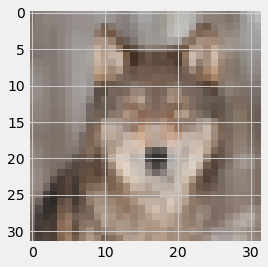


Roulement de tambour...
Prédictions :

wolf : 99.92 %
table : 0.08 %
rose : 0.0 %




In [9]:
# Visualisation de l'image
layer_outputs = [layer.output for layer in model.layers]
test_image = "src/images/loup_qui_tue.jpg"

# Le chargement de l'image doit être augmenté puisque notre model prend des lots d'images.
img = image.load_img(test_image, target_size=(32,32, 3))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

# Nous testons maintenant notre modèle sur une image
fonctions.test_model("saved_models/model_ML.h5","src/images/loup_qui_tue.jpg", DATASET)